In [1]:
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from azureml.core import Workspace, Dataset
import matplotlib.pyplot as plt

In [2]:
# Auto-reload to directly apply changes 
import autoreload
%load_ext autoreload
%autoreload 2

# Display all columns
pd.set_option("display.max_columns", None)

In [3]:
WORKDIR = os.getcwd()
DATADIR = os.path.join(WORKDIR, 'data')

## Import data

In [4]:
def load_dataset(filename):
    # Load data
    df = pd.read_csv(filename)
    df = df.set_index("data_index_")

    # Set timezone
    df.index = pd.to_datetime(df.index).tz_convert("Europe/Amsterdam")
    return df

In [5]:
load_actuals = load_dataset(os.path.join(DATADIR, 'load_actuals.csv'))
weather = load_dataset(os.path.join(DATADIR, 'weather.csv'))
wind_solar_predictions = load_dataset(os.path.join(DATADIR, 'wind_solar_predictions.csv'))

In [6]:
# merge all three dataframes
energy_data = weather.merge(wind_solar_predictions,on='data_index_', how='outer').merge(load_actuals,on='data_index_', how='outer')

In [7]:
energy_data.head(10)

,temperature,solar_ghi,solar_prediction_mw,wind_prediction_mw,load_actuals_mw
data_index_,,,,,
2020-01-01 01:00:00+01:00,274.989655,0.0,0.0,70.865426,95.756328
2020-01-01 01:15:00+01:00,274.925659,0.0,0.0,69.296785,94.836196
2020-01-01 01:30:00+01:00,274.861694,0.0,0.0,66.977409,93.798127
2020-01-01 01:45:00+01:00,274.797699,0.0,0.0,64.305715,92.162902
2020-01-01 02:00:00+01:00,274.423157,0.0,0.0,61.128262,91.506670
2020-01-01 02:15:00+01:00,274.383179,0.0,0.0,57.230368,90.651134
2020-01-01 02:30:00+01:00,274.343201,0.0,0.0,53.949524,89.609819
2020-01-01 02:45:00+01:00,274.303223,0.0,0.0,50.516558,88.333277
2020-01-01 03:00:00+01:00,274.266571,0.0,0.0,47.263374,87.394102


## Inspect data

In [8]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50497 entries, 2020-01-01 01:00:00+01:00 to 2021-06-10 02:00:00+02:00
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          50497 non-null  float64
 1   solar_ghi            50497 non-null  float64
 2   solar_prediction_mw  50497 non-null  float64
 3   wind_prediction_mw   50497 non-null  float64
 4   load_actuals_mw      50497 non-null  float64
dtypes: float64(5)
memory usage: 2.3 MB


In [9]:
energy_data.isnull().sum()

temperature            0
solar_ghi              0
solar_prediction_mw    0
wind_prediction_mw     0
load_actuals_mw        0
dtype: int64

## Visualize data

In [32]:
def plot_figure_load(df):
    fig = go.Figure(
        make_subplots(
            shared_xaxes=True, vertical_spacing=0.02,
        )
    )
    fig.add_trace(
        go.Scatter(
            x=df.index,
            y=df["load_actuals_mw"],
            name="Actual",
            legendgroup="Actual",
            showlegend=True,
            line_color="green",
            opacity=0.5,
        ))
    title_text = "Energy demand"
    fig.update_layout(title={'text': title_text,
                             'y': 0.95,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      autosize=False,
                      width=800,
                      height=800,
                      paper_bgcolor='white',
                      plot_bgcolor='white'
                      )

    fig.update_yaxes(title_text="Demand [MW]", title_standoff=30, title_font=dict(size=12),
                     showgrid=True, gridcolor='lightgrey',
                     zeroline=True, zerolinecolor='lightgrey',
                     )
    fig.update_xaxes(title_text="Date",
                     showgrid=True, gridcolor='lightgrey',
                     zeroline=True, zerolinecolor='lightgrey',
                     )

    return fig

In [33]:
fig = plot_figure_load(energy_data)
fig.show()

## Data distributions

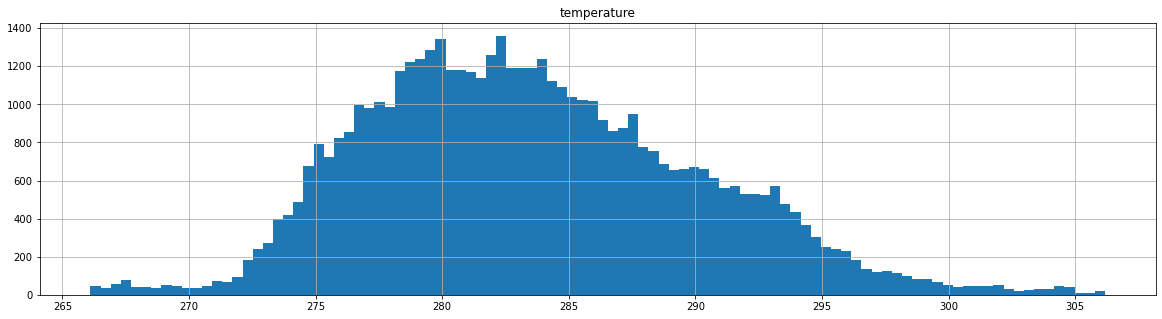

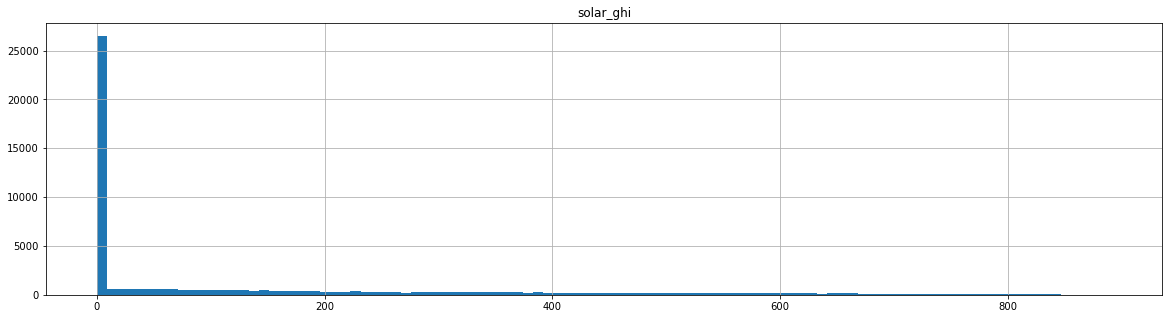

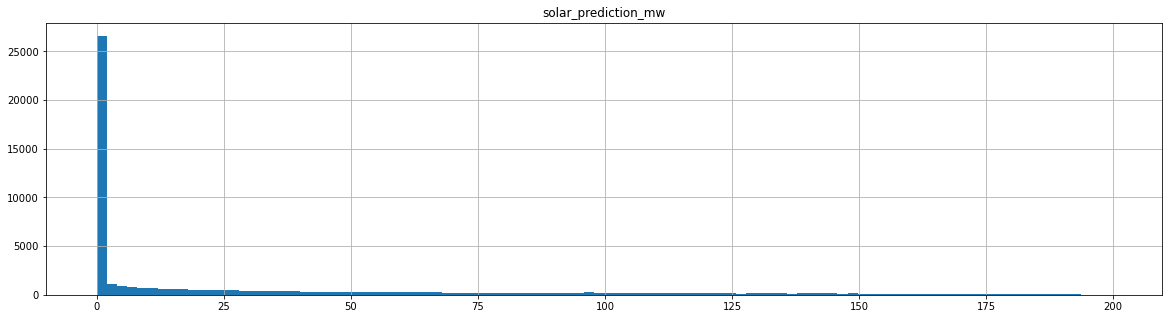

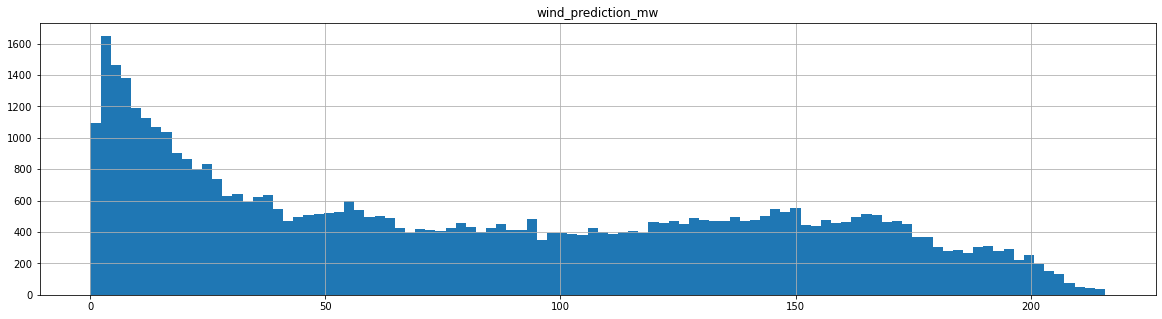

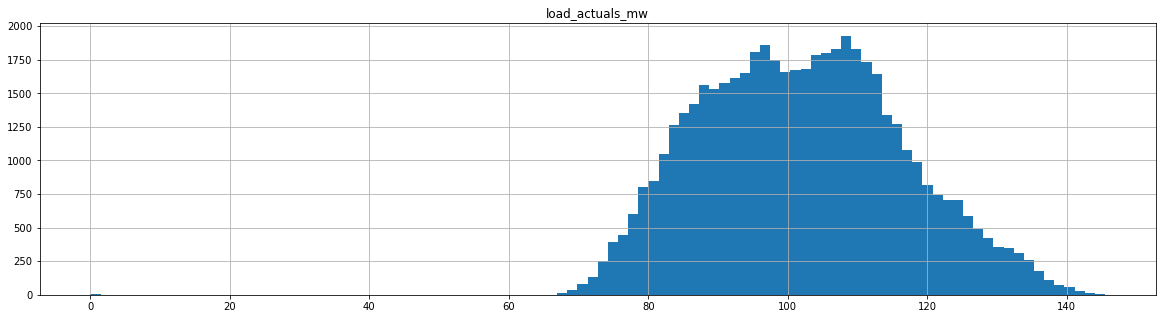

In [12]:
for column in energy_data.columns.to_list():
    plt.figure(figsize=(20,5))
    plt.hist(energy_data[column], bins=100)
    plt.title(column)
    plt.grid()
    plt.show()

In [13]:
energy_data[energy_data.load_actuals_mw == 0]

,temperature,solar_ghi,solar_prediction_mw,wind_prediction_mw,load_actuals_mw
data_index_,,,,,
2021-04-10 20:45:00+02:00,280.404907,0.0,0.0,139.489594,0.0
2021-04-10 21:00:00+02:00,280.318359,0.0,0.0,140.486343,0.0
2021-04-10 21:15:00+02:00,280.232483,0.0,0.0,141.183603,0.0
2021-04-10 21:30:00+02:00,280.146637,0.0,0.0,142.101212,0.0
2021-04-10 21:45:00+02:00,280.060791,0.0,0.0,142.991407,0.0
2021-04-10 22:00:00+02:00,279.974823,0.0,0.0,143.981950,0.0
2021-04-10 22:15:00+02:00,279.888733,0.0,0.0,144.707141,0.0
2021-04-10 22:30:00+02:00,279.802612,0.0,0.0,144.997321,0.0


## Non-zero energy demand distribution

<AxesSubplot:>

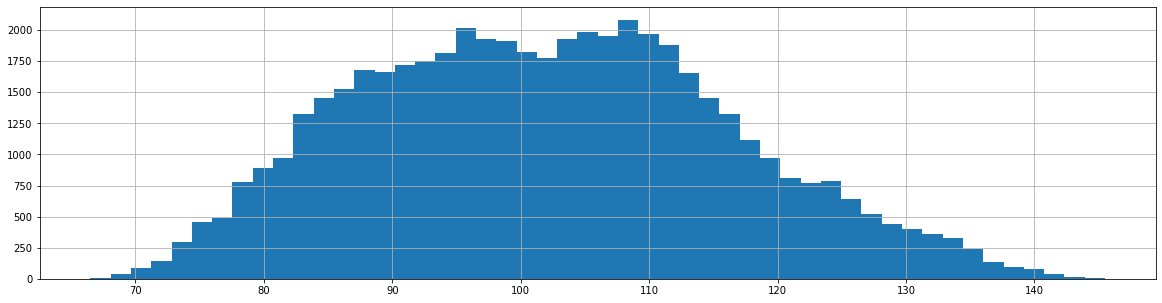

In [27]:
energy_data[energy_data.load_actuals_mw != 0].load_actuals_mw.hist(bins=50, figsize=(20,5))

## Split energy demand into three quantiles (for the dashboard)

In [24]:
normal_charge = np.floor(np.quantile(energy_data[energy_data.load_actuals_mw != 0].load_actuals_mw, 0.33))
middle_charge = np.floor(np.quantile(energy_data[energy_data.load_actuals_mw != 0].load_actuals_mw, 0.66))
low_charge = np.floor(np.quantile(energy_data[energy_data.load_actuals_mw != 0].load_actuals_mw, 1.0))

print(normal_charge, middle_charge, low_charge)

94.0 108.0 145.0


In [24]:
energy_difference = (energy_data[energy_data.load_actuals_mw != 0].load_actuals_mw - energy_data[energy_data.load_actuals_mw != 0].wind_prediction_mw - energy_data[energy_data.load_actuals_mw != 0].solar_prediction_mw) 

<AxesSubplot:>

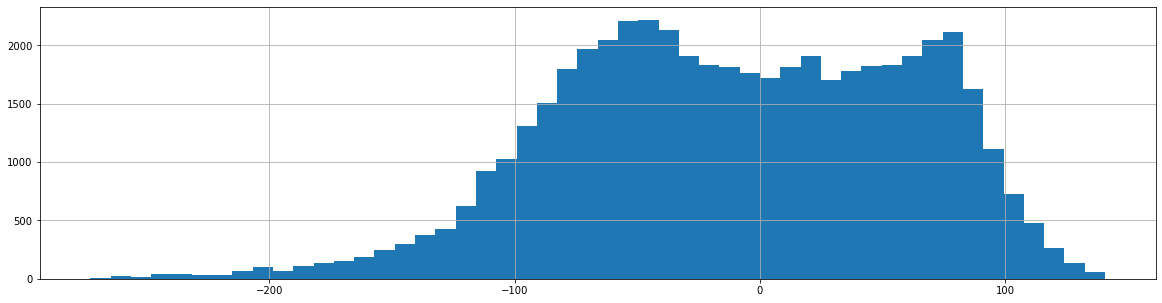

In [26]:
energy_difference.hist(bins=50, figsize=(20,5))

In [48]:
normal_charge = np.floor(np.quantile(energy_difference, 0.33))
middle_charge = np.floor(np.quantile(energy_difference, 0.66))
low_charge = np.floor(np.quantile(energy_difference, 1.0))

print(low_charge, middle_charge, normal_charge)

140.0 26.0 -47.0


## Scale data (after split)

In [14]:
# scaler = MinMaxScaler()
# for column in weather_data.drop('load_actuals_mw', axis=1).columns.to_list():
#     plt.figure(figsize=(20,5))
#     plt.hist(scaler.fit_transform(weather_data[column].to_numpy().reshape(-1, 1)), bins=100)
#     plt.title(column)
#     plt.show()

## 15 min data (copy)

In [28]:
energy_data_15_min = energy_data.copy()
energy_data_15_min.head()

,temperature,solar_ghi,solar_prediction_mw,wind_prediction_mw,load_actuals_mw
data_index_,,,,,
2020-01-01 01:00:00+01:00,274.989655,0.0,0.0,70.865426,95.756328
2020-01-01 01:15:00+01:00,274.925659,0.0,0.0,69.296785,94.836196
2020-01-01 01:30:00+01:00,274.861694,0.0,0.0,66.977409,93.798127
2020-01-01 01:45:00+01:00,274.797699,0.0,0.0,64.305715,92.162902
2020-01-01 02:00:00+01:00,274.423157,0.0,0.0,61.128262,91.506670


In [29]:
# for column in energy_data_15_min.columns.to_list():
#     print(energy_data_15_min[energy_data_15_min[column] == 0][column])

## Real-time data (drop weather information)

In [30]:
energy_data_realtime = energy_data.drop(['temperature', 'solar_ghi'], axis=1)
energy_data_realtime.head()

,solar_prediction_mw,wind_prediction_mw,load_actuals_mw
data_index_,,,
2020-01-01 01:00:00+01:00,0.0,70.865426,95.756328
2020-01-01 01:15:00+01:00,0.0,69.296785,94.836196
2020-01-01 01:30:00+01:00,0.0,66.977409,93.798127
2020-01-01 01:45:00+01:00,0.0,64.305715,92.162902
2020-01-01 02:00:00+01:00,0.0,61.128262,91.506670


## Resample data to daily average

In [31]:
energy_data_daily = energy_data.resample('D').mean()
energy_data_daily = energy_data_daily.reset_index()
energy_data_daily['data_index_'] = energy_data_daily['data_index_'].apply(lambda x: x.date())
energy_data_daily = energy_data_daily.set_index('data_index_')

In [32]:
energy_data_daily.head()

,temperature,solar_ghi,solar_prediction_mw,wind_prediction_mw,load_actuals_mw
data_index_,,,,,
2020-01-01,274.919020,42.663104,11.562511,29.242464,92.924560
2020-01-02,278.020686,19.332995,3.163379,100.044628,107.043729
2020-01-03,281.066252,10.933115,1.198061,143.033258,108.116379
2020-01-04,278.480563,33.503310,6.980235,103.775679,103.160229
2020-01-05,278.004607,38.834253,6.731682,43.812435,102.308454


In [33]:
# for column in energy_data_daily.columns.to_list():
#     print(energy_data_daily[energy_data_daily[column] == 0][column])

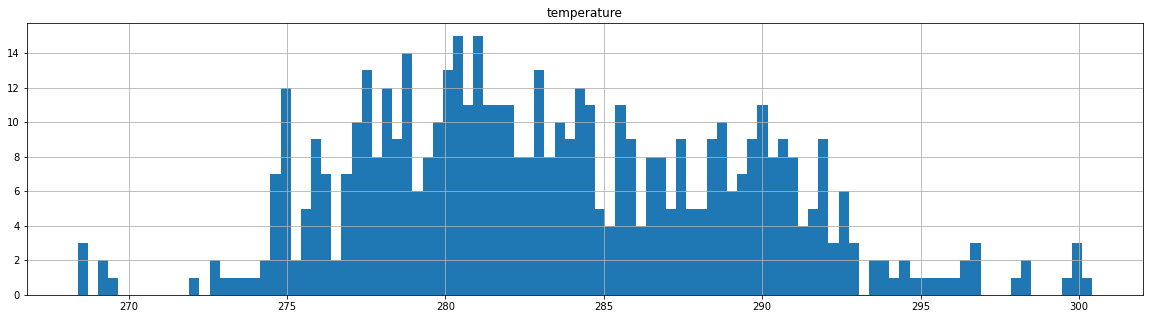

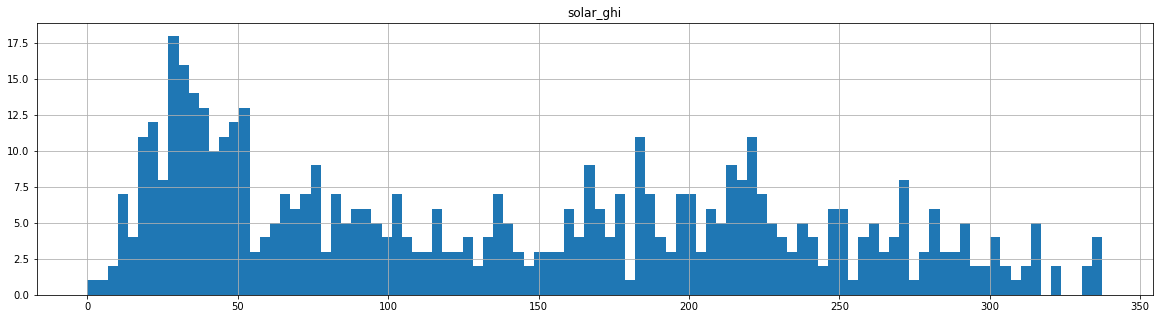

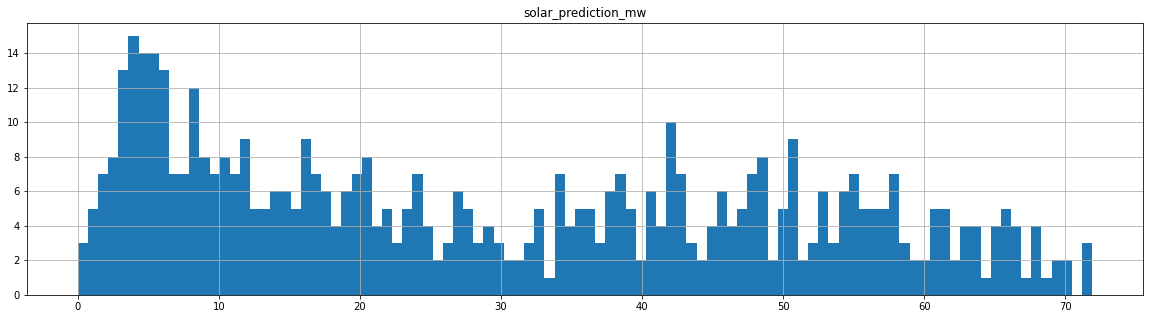

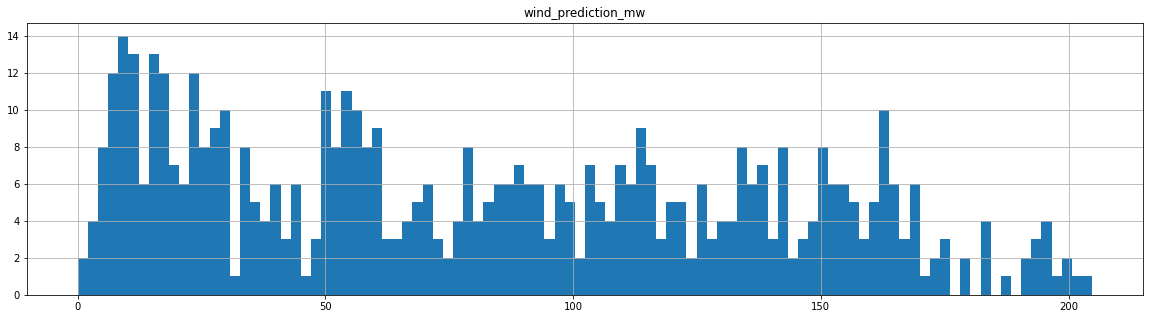

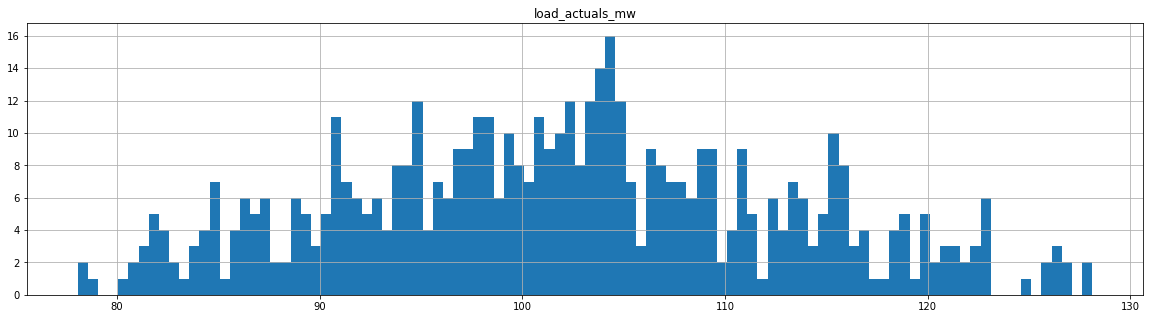

In [34]:
for column in energy_data_daily.columns.to_list():
    plt.figure(figsize=(20,5))
    plt.hist(energy_data_daily[column], bins=100)
    plt.title(column)
    plt.grid()
    plt.show()

## Save datasets

In [35]:
energy_data_15_min.to_csv(os.path.join(DATADIR, 'energy_data_15_min.csv'), index=True)
energy_data_daily.to_csv(os.path.join(DATADIR, 'energy_data_daily.csv'), index=True)
energy_data_realtime.to_csv(os.path.join(DATADIR, 'energy_data_realtime.csv'), index=True)

## Register data to the workspace

In [36]:
# get the workspace from config.json
ws = Workspace.from_config()
# get the datastore to upload our data
datastore = ws.get_default_datastore()

In [37]:
datastore.upload_files([os.path.join(DATADIR, 'energy_data_15_min.csv')], target_path='data', overwrite=True)
datastore.upload_files([os.path.join(DATADIR, 'energy_data_daily.csv')], target_path='data', overwrite=True)
datastore.upload_files([os.path.join(DATADIR, 'energy_data_realtime.csv')], target_path='data', overwrite=True)

Uploading an estimated of 1 files


In [ ]:
energy_data_15_min = Dataset.Tabular.from_delimited_files(datastore.path('data/energy_data_15_min.csv'))
energy_data_daily = Dataset.Tabular.from_delimited_files(datastore.path('data/energy_data_daily.csv'))
energy_data_realtime = Dataset.Tabular.from_delimited_files(datastore.path('data/energy_data_realtime.csv'))

In [ ]:
energy_data_15_min = energy_data_15_min.register(workspace=ws, name="energy_data_15_min", description="processed PyTown energy demand per 15 min")
energy_data_daily = energy_data_daily.register(workspace=ws, name="energy_data_daily", description="processed PyTown energy demand (daily average)")
energy_data_realtime = energy_data_realtime.register(workspace=ws, name="energy_data_realtime", description="processed PyTown energy demand (real-time without weather information)")